# NYC Motor Vehicle Collisions Prediction Dataset

Data Source - https://www.kaggle.com/kukuroo3/nyc-motor-vehicle-collisions-to-person


## Loading the Data and Studying it -  

In [2]:
# Importing all necessary libraries:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Importing the data from source as a csv file and converting it into a Pandas DataFrame:
data = pd.read_csv('NYC_Motor_Vehicle_Collisions_to_Person.csv')

# Viewing the snapshot of first 5 rows of the loaded dataset:
data.head()

,CRASH_DATE,CRASH_TIME,PERSON_INJURY,PERSON_AGE,BODILY_INJURY,SAFETY_EQUIPMENT,PERSON_SEX,PERSON_TYPE,PED_LOCATION,CONTRIBUTING_FACTOR_2,...,COMPLAINT,EMOTIONAL_STATUS,VEHICLE_ID,PERSON_ID,CONTRIBUTING_FACTOR_1,POSITION_IN_VEHICLE,PED_ROLE,UNIQUE_ID,PED_ACTION,COLLISION_ID
0,2021-05-02,21:00,Killed,62.0,Head,NaN,F,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,...,Severe Bleeding,Apparent Death,NaN,f2f329b6-2dfc-4bd0-b751-2e4255f1ea06,Traffic Control Disregarded,NaN,Pedestrian,11791937,Crossing Against Signal,4412948
1,2021-05-21,0:00,Killed,24.0,Entire Body,Air Bag Deployed,M,Occupant,NaN,NaN,...,Internal,Apparent Death,19986231.0,e27e12a2-0485-4e22-b692-3f8a765d2582,NaN,Driver,Driver,11819198,NaN,4419608
2,2021-10-15,2:00,Killed,30.0,Head,None,M,Occupant,NaN,NaN,...,Internal,Apparent Death,20091024.0,1a6f5aa7-5125-4be2-8499-fe7977cb0d90,NaN,Driver,Driver,11998317,NaN,4467504
3,2021-04-17,13:00,Killed,71.0,Head,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Unspecified,...,Internal,Unconscious,NaN,b950706b-00a4-485c-84c5-777208cc3cc9,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Pedestrian,11745791,"Crossing, No Signal, or Crosswalk",4408062
4,2021-05-25,22:00,Killed,69.0,Entire Body,NaN,F,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Unspecified,...,None Visible,Conscious,NaN,6504ea0a-c92d-444c-8127-284943be9aac,Unspecified,NaN,Pedestrian,11991283,"Crossing, No Signal, Marked Crosswalk",4420918


A snapshot of the dataset shows it to be mostly a dataset of categorical variables. 
The column **'PERSON_INJURY'** appears to be the target column which would become our target variable (y) when selecting models. 

Also the target variable is a binary classification column with labels **0 ('Injured') and 1 ('Killed')**. 
This would form the basis of predicitions in future.

For all the categorical we would need to use one-hot encoding before training different models.

In [4]:
# Checking the size of dataset - total rows and columns:
data.shape

(45669, 21)

In [5]:
# Getting the basic information about the dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45669 entries, 0 to 45668
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CRASH_DATE             45669 non-null  object 
 1   CRASH_TIME             45669 non-null  object 
 2   PERSON_INJURY          45669 non-null  object 
 3   PERSON_AGE             45248 non-null  float64
 4   BODILY_INJURY          45669 non-null  object 
 5   SAFETY_EQUIPMENT       39434 non-null  object 
 6   PERSON_SEX             45669 non-null  object 
 7   PERSON_TYPE            45669 non-null  object 
 8   PED_LOCATION           6571 non-null   object 
 9   CONTRIBUTING_FACTOR_2  6546 non-null   object 
 10  EJECTION               39429 non-null  object 
 11  COMPLAINT              45669 non-null  object 
 12  EMOTIONAL_STATUS       45669 non-null  object 
 13  VEHICLE_ID             39098 non-null  float64
 14  PERSON_ID              45669 non-null  object 
 15  CO

In [6]:
# Getting a statistical summary of the dataset (rounded to 2 decimals):
data.describe().round(2)

,PERSON_AGE,VEHICLE_ID,UNIQUE_ID,COLLISION_ID
count,45248.00,39098.00,45669.00,45669.00
mean,37.49,19996634.31,11835877.59,4431736.91
std,81.49,79409.81,137582.84,27534.03
min,-971.00,19821967.00,11537246.00,4380715.00
25%,25.00,19960783.75,11772893.00,4408781.00
50%,34.00,20008772.50,11856795.00,4432358.00
75%,48.00,20058683.00,11944207.00,4455395.00
max,9999.00,20109925.00,12031464.00,4478832.00


## Data Cleaning and Formatting - 

#### Removing Irrelevant Data or Columns:

In [7]:
# dropping irrelevant columns from the dataset and assigning remaining dataset to a variable:
NYC_df = data.drop(['VEHICLE_ID', 'PERSON_ID','UNIQUE_ID','COLLISION_ID'], axis = 1)

# getting a list of columns in the dataset:
NYC_df.columns

Index(['CRASH_DATE', 'CRASH_TIME', 'PERSON_INJURY', 'PERSON_AGE',
       'BODILY_INJURY', 'SAFETY_EQUIPMENT', 'PERSON_SEX', 'PERSON_TYPE',
       'PED_LOCATION', 'CONTRIBUTING_FACTOR_2', 'EJECTION', 'COMPLAINT',
       'EMOTIONAL_STATUS', 'CONTRIBUTING_FACTOR_1', 'POSITION_IN_VEHICLE',
       'PED_ROLE', 'PED_ACTION'],
      dtype='object')

#### Missing Values Detection and Imputation:

In [8]:
# Getting a list of only Missing values columns:
column_with_nan = NYC_df.columns[NYC_df.isnull().any()]

# printing the count of missing values in each column using for loop:
for column in column_with_nan:
    print(column, ': ' , NYC_df[column].isnull().sum())

PERSON_AGE :  421
SAFETY_EQUIPMENT :  6235
PED_LOCATION :  39098
CONTRIBUTING_FACTOR_2 :  39123
EJECTION :  6240
CONTRIBUTING_FACTOR_1 :  39111
POSITION_IN_VEHICLE :  6221
PED_ACTION :  39098


In [9]:
# Imputing missing values in PERSON_AGE column with mean PERSON_AGE values:
NYC_df['PERSON_AGE'] = NYC_df['PERSON_AGE'].fillna(np.mean(data['PERSON_AGE']))

# Imputing missing values in Other columns with 'Unknown' or Most common values:
NYC_df['SAFETY_EQUIPMENT'].fillna("Unknown",inplace = True)
NYC_df['PED_LOCATION'].fillna("Unknown",inplace = True)
NYC_df['CONTRIBUTING_FACTOR_2'].fillna("Unspecified",inplace = True)
NYC_df['EJECTION'].fillna("Not Ejected",inplace = True)
NYC_df['CONTRIBUTING_FACTOR_1'].fillna("Unspecified",inplace = True)
NYC_df['POSITION_IN_VEHICLE'].fillna("Unknown",inplace = True)
NYC_df['PED_ACTION'].fillna("Unknown",inplace = True)

# Re-checking the missing values in dataset after filling missing values:
NYC_df.isnull().sum()

CRASH_DATE               0
CRASH_TIME               0
PERSON_INJURY            0
PERSON_AGE               0
BODILY_INJURY            0
SAFETY_EQUIPMENT         0
PERSON_SEX               0
PERSON_TYPE              0
PED_LOCATION             0
CONTRIBUTING_FACTOR_2    0
EJECTION                 0
COMPLAINT                0
EMOTIONAL_STATUS         0
CONTRIBUTING_FACTOR_1    0
POSITION_IN_VEHICLE      0
PED_ROLE                 0
PED_ACTION               0
dtype: int64

Now, we have replaced Missing values in all the columns so there are no missing values in our DataFrame.

#### Changing Data Type for Columns:

In [10]:
# converting the 'Crash Date' column to datetime format:
NYC_df['CRASH_DATE']= pd.to_datetime(NYC_df['CRASH_DATE'])

# converting the 'Person Age' column to integer format:
NYC_df['PERSON_AGE']= NYC_df['PERSON_AGE'].astype('int64')

# getting a summary of all columns:
NYC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45669 entries, 0 to 45668
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CRASH_DATE             45669 non-null  datetime64[ns]
 1   CRASH_TIME             45669 non-null  object        
 2   PERSON_INJURY          45669 non-null  object        
 3   PERSON_AGE             45669 non-null  int64         
 4   BODILY_INJURY          45669 non-null  object        
 5   SAFETY_EQUIPMENT       45669 non-null  object        
 6   PERSON_SEX             45669 non-null  object        
 7   PERSON_TYPE            45669 non-null  object        
 8   PED_LOCATION           45669 non-null  object        
 9   CONTRIBUTING_FACTOR_2  45669 non-null  object        
 10  EJECTION               45669 non-null  object        
 11  COMPLAINT              45669 non-null  object        
 12  EMOTIONAL_STATUS       45669 non-null  object        
 13  C

#### Replacing Column Values with Specific Values:

In [11]:
# Replacing some values in each column with specific values:
# Changing "Does Not Apply" to "Unknown"or "None" 
NYC_df['BODILY_INJURY'].replace('Does Not Apply','None',inplace=True)  
NYC_df['PERSON_SEX'].replace('U','M',inplace=True)
NYC_df['PED_LOCATION'].replace('Does Not Apply','Unknown',inplace=True)
NYC_df['COMPLAINT'].replace('Does Not Apply','Unknown',inplace=True)
NYC_df['EMOTIONAL_STATUS'].replace('Does Not Apply','Unknown',inplace=True)
NYC_df['PED_ACTION'].replace('Does Not Apply','Unknown',inplace=True)

We see that the gender column has one row with 'U' category. As this row is irrelevant we would not delete the row but replace its gender value with the mode of gender column i.e., 'M.

#### Exploring Unique Values:

In [12]:
# Exploring the unique values in each column of dataset - using a for loop:
for col in NYC_df.columns:
    print(col)   # printing the column name
    print(NYC_df[col].unique()[:5])  # viewing the first 5 unique values from each column
    print(NYC_df[col].nunique())   # total count of unique values in the column
    print()  # adding a line break between column data

CRASH_DATE
['2021-05-02T00:00:00.000000000' '2021-05-21T00:00:00.000000000'
 '2021-10-15T00:00:00.000000000' '2021-04-17T00:00:00.000000000'
 '2021-05-25T00:00:00.000000000']
320

CRASH_TIME
['21:00' '0:00' '2:00' '13:00' '22:00']
24

PERSON_INJURY
['Killed' 'Injured']
2

PERSON_AGE
[62 24 30 71 69]
125

BODILY_INJURY
['Head' 'Entire Body' 'Chest' 'Unknown' 'Abdomen - Pelvis']
14

SAFETY_EQUIPMENT
['Unknown' 'Air Bag Deployed' 'None' 'Lap Belt & Harness'
 'Helmet (Motorcycle Only)']
16

PERSON_SEX
['F' 'M']
2

PERSON_TYPE
['Pedestrian' 'Occupant' 'Bicyclist' 'Other Motorized']
4

PED_LOCATION
['Pedestrian/Bicyclist/Other Pedestrian at Intersection' 'Unknown'
 'Pedestrian/Bicyclist/Other Pedestrian Not at Intersection']
3

CONTRIBUTING_FACTOR_2
['Pedestrian/Bicyclist/Other Pedestrian Error/Confusion' 'Unspecified'
 'Traffic Control Disregarded' 'Failure to Yield Right-of-Way'
 'Driver Inattention/Distraction']
39

EJECTION
['Not Ejected' 'Trapped' 'Ejected' 'Partially Ejected']
4

COMPL

## Exploratory Data Analysis (EDA) - 

Now that the dataset has been cleaned and formatted we exlore it by performing some Exploratory Data Analysis and draw insights from different visualizations created. 

##### Ques 1 - When do the most traffic accidents occur?

In [13]:
# converting Months to abbreviated Month Names:
import calendar
month_name = []

# Extracting Months from Crash_Date and using it to get abbreviated month names using for loop:
crash_month = pd.DatetimeIndex(NYC_df['CRASH_DATE']).month
for i in crash_month:
    mnth_abb = calendar.month_abbr[i]
    month_name.append(mnth_abb)

# assigning month name to a column
NYC_df['CRASH_Mnth_Name'] = month_name

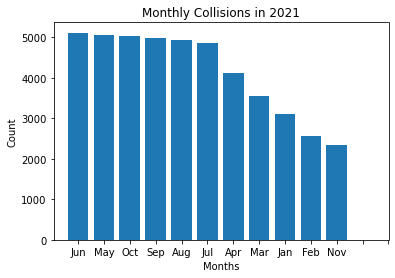

In [14]:
# plotting the count of Mnthly Crashes in 2021:
df_month = NYC_df['CRASH_Mnth_Name'].value_counts()
plt.bar(df_month.index,df_month.values)
plt.xticks(range(0,13))
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Monthly Collisions in 2021')
plt.show()

Above bar shows that in 2021, the month of June appear to have the most number of crashes on NYC roads, while November has the least.

##### Ques 2 - What time of the day do most of the traffic accidents occur?

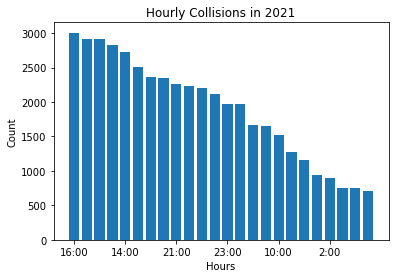

In [15]:
# plotting the count of Hourly Crashes in 2021:
df_hour = NYC_df['CRASH_TIME'].value_counts().sort_values(ascending=False)
plt.bar(df_hour.index,df_hour.values)
plt.xticks(range(0,24,4))
plt.xlabel('Hours')
plt.ylabel('Count')
plt.title('Hourly Collisions in 2021')
plt.show()

Also, most number of collisions in 2021 seem to have happened around 16:00 or 4:00 pm in the evening.

##### Ques 3 - Which age and gender people were involved in most of the NYC collisions?

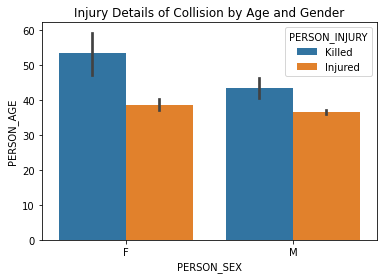

In [16]:
# Visualizing the relation between person's Age, Gender and PERSON_INJURY:
sns.barplot(x='PERSON_SEX', y='PERSON_AGE', hue='PERSON_INJURY',data=NYC_df)
plt.title('Injury Details of Collision by Age and Gender')
plt.show()

This graph shows that in the NYC collisions more Females were killed than Males. Also the proportion of Females injured were quite similar to injured Males.  

Also, most Females killed were in age group 50-60 years while, most Males killed were in age group 40-50 years.

##### Ques 4 - What  Type of Persons and Ejection Types were involved in most of the NYC collisions?

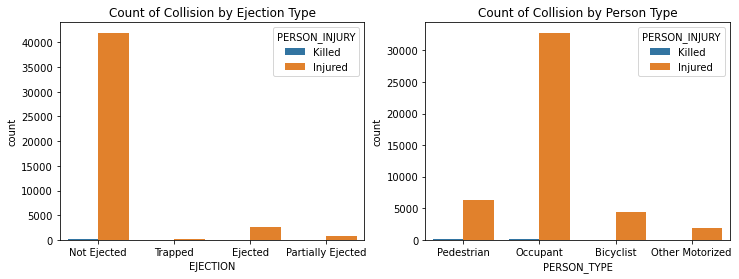

In [17]:
# Visualizing the Count of Collsions by person's EJECTION type and PERSON_TYPE:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1) # the figure has 1 row, 2 columns, and this plot is the first plot.
sns.countplot(x='EJECTION',data=NYC_df,hue='PERSON_INJURY')
plt.title('Count of Collision by Ejection Type')

plt.subplot(1, 2, 2) # the figure has 1 row, 2 columns, and this plot is the second plot.
sns.countplot(x='PERSON_TYPE',data=NYC_df,hue='PERSON_INJURY')
plt.title('Count of Collision by Person Type')
plt.show()

The above plot on the left shows the count of collisions for different types of Ejection. We can see that most of the people were Injured and that too because the could Not Eject. 

Also, of those injured in collisions most people were Occupants of the motor vehicle themselves or Pedestrians.

##### Ques 5 - What was the type of PED_LOCATION, PED_ROLE and EMOTIONAL_STATUS of people involved in most NYC collisions?

D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

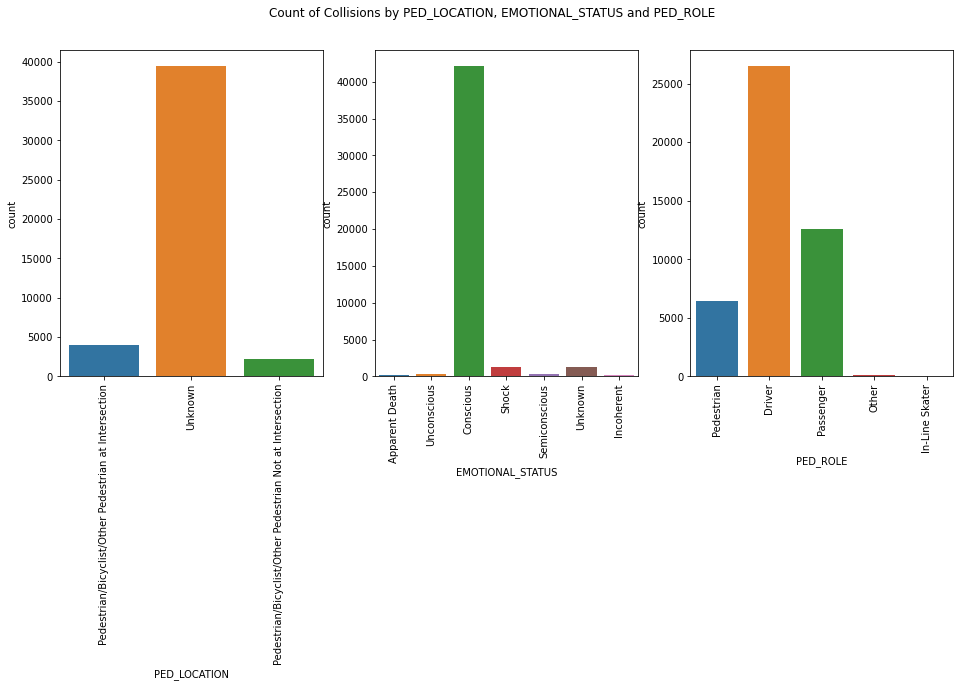

In [18]:
# Visualizing the Count of Collsions by person's PED_LOCATION, EMOTIONAL_STATUS and PED_ROLE:
categorical_1 = ['PED_LOCATION', 'EMOTIONAL_STATUS', 'PED_ROLE']
fig, ax = plt.subplots(1, 3, figsize=(16, 6))

for variable, subplot in zip(categorical_1, ax.flatten()):
    sns.countplot(NYC_df[variable], ax=subplot, data=NYC_df)
    
    # add a title to the entire figure using suptitle() function:
    plt.suptitle('Count of Collisions by PED_LOCATION, EMOTIONAL_STATUS and PED_ROLE')
   
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

plt.show()

The Pedestrian Location of most of the people injured in NYC collisions in 2021 were not Known (Unknown). Most of the injured people were in Conscious state and in most cases those injured were in the role of Driver at the time of collision. 

##### Ques 6 - Which were most common type of BODILY_INJURY and COMPLAINT faced by those injured after the collision?

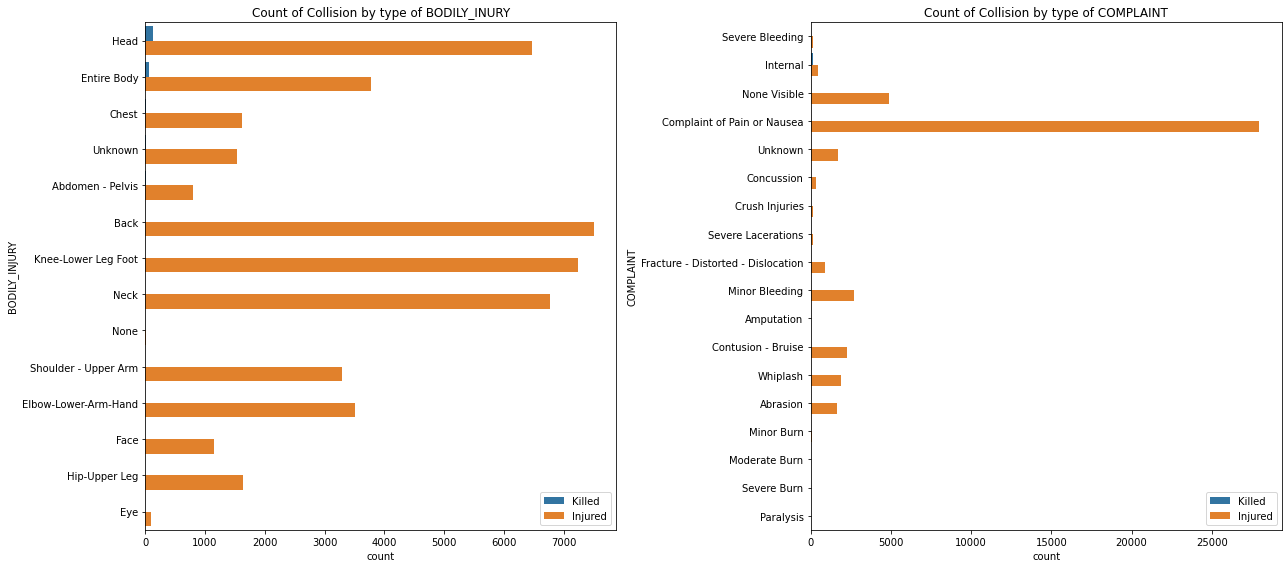

In [19]:
# Visualizing the Count of Collsions by person's BODILY_INJURY and COMPLAINT :
fig, axes = plt.subplots(1, 2, figsize=(18,8))

sns.countplot(y="BODILY_INJURY", hue="PERSON_INJURY", data=NYC_df, ax=axes[0])
axes[0].set_title('Count of Collision by type of BODILY_INURY')
axes[0].legend(loc='lower right')

sns.countplot(y="COMPLAINT", hue="PERSON_INJURY", data=NYC_df, ax=axes[1])
axes[1].set_title('Count of Collision by type of COMPLAINT')
plt.tight_layout()
axes[1].legend(loc='lower right')

plt.show()

As shown in the plots above the injured faced mostly Back, Knee-Lower Leg Foot and Neck injuries after collision.

Those injured most often complained about Pain or Nausea after meeting with accident.

##### Ques 7 - What was the POSITION_IN_VEHICLE and type of SAFETY_EQUIPMENT during collision?

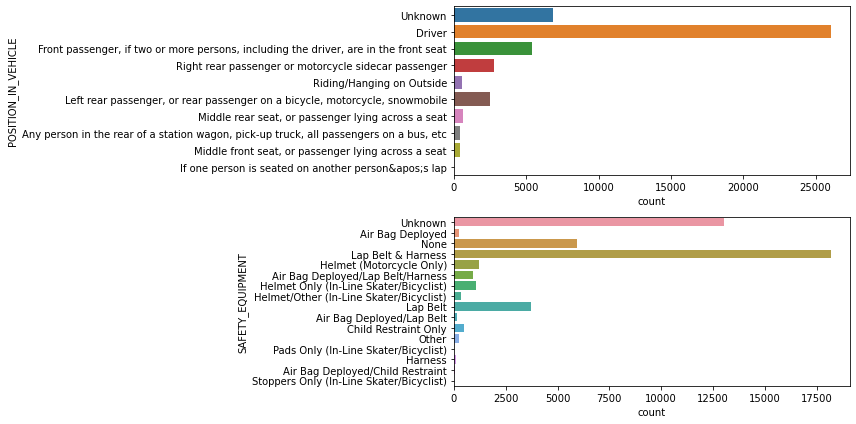

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(12,6))
sns.countplot(y="POSITION_IN_VEHICLE", data=NYC_df,ax=axes[0])
sns.countplot(y="SAFETY_EQUIPMENT", data=NYC_df,ax=axes[1])
plt.tight_layout()
plt.show()

The first plot above shows that mostly injured persons during collision were at Driver's position in the vehicle. The second plot shows that Lap Belt & Harness were used as Safety Equipment by most injured during the NYC Collisions in 2021. This is ironical as people got injured even after using safety equiments. 

However, the second highest of those injured were those about whom Safety Equipment use was Unknown.

### Computing Correlation with Categorical Features - Using a Chi-square test:

In [21]:
# Chi-square test between all the categorical features and PERSON_INJURY variable to find the correlation - 
# H0: The variables are not correlated with each other. 
# importing the required function:
from scipy.stats import chi2_contingency

# looping through each of the categorical features in dataset:
for i in ['BODILY_INJURY', 'SAFETY_EQUIPMENT', 'PERSON_SEX', 'PERSON_TYPE',
       'PED_LOCATION', 'CONTRIBUTING_FACTOR_2', 'EJECTION', 'COMPLAINT',
       'EMOTIONAL_STATUS', 'CONTRIBUTING_FACTOR_1', 'POSITION_IN_VEHICLE',
       'PED_ROLE', 'PED_ACTION']:
    
    # Cross-tabulation between PERSON_INJURY and categorical feature:
    CrosstabResult = pd.crosstab(index=NYC_df[i],columns=NYC_df['PERSON_INJURY'])
    
    # performing Chi-sq test:
    ChisqResult = chi2_contingency(CrosstabResult)
    
    # p-value is the probability of H0 being True, if p-value > 0.5, we accept HO - 
    print(i,'---->', 'p-value of Chi-sq test is:', round((ChisqResult[1]),4))

BODILY_INJURY ----> p-value of Chi-sq test is: 0.0
SAFETY_EQUIPMENT ----> p-value of Chi-sq test is: 0.0
PERSON_SEX ----> p-value of Chi-sq test is: 0.0
PERSON_TYPE ----> p-value of Chi-sq test is: 0.0
PED_LOCATION ----> p-value of Chi-sq test is: 0.0
CONTRIBUTING_FACTOR_2 ----> p-value of Chi-sq test is: 0.993
EJECTION ----> p-value of Chi-sq test is: 0.0
COMPLAINT ----> p-value of Chi-sq test is: 0.0
EMOTIONAL_STATUS ----> p-value of Chi-sq test is: 0.0
CONTRIBUTING_FACTOR_1 ----> p-value of Chi-sq test is: 0.0
POSITION_IN_VEHICLE ----> p-value of Chi-sq test is: 0.0
PED_ROLE ----> p-value of Chi-sq test is: 0.0
PED_ACTION ----> p-value of Chi-sq test is: 0.0


From the above Chi-square computations we find that only **'CONTRIBUTING_FACTOR_2'** has a p-value > 0.5 so we accept the null hypothesis and say that 'CONTRIBUTING_FACTOR_2' is not correlated to our target variable, PERSON_INJURY.

For all other features, their respective p-value < 0.5 so, we reject the H0 and say they are correlated with our target variable, PERSON_INJURY.

As only one feature PERSON_AGE is numerical in our dataset we do not find its correlation separately.

## Setting up the validation framework - 


#### Splitting the dataset & Defining Feature Matrix and Target Variable -

In [22]:
from sklearn.model_selection import train_test_split

# splitting the dataset using sklearn into 60-20-20:
# Step 1 - splitting dataset into full train and test subsets first:
df_full_train, df_test = train_test_split(NYC_df, test_size=0.2,random_state=1) 

# Step 2 - splitting full train subset again into training set and validation set:
df_train, df_val = train_test_split(df_full_train, test_size=0.25,random_state = 1)

# checking the size of 3 subsets:
df_train.shape, df_val.shape, df_test.shape

((27401, 18), (9134, 18), (9134, 18))

In [23]:
# Resetting indices for each of the subset: 
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [24]:
# Getting our target variable column ('PERSON_INJURY') subsets as respective Numpy arrays:
y_train = df_train.PERSON_INJURY.values
y_val = df_val.PERSON_INJURY.values
y_test = df_test.PERSON_INJURY.values

In [25]:
# Deleting 'PERSON_INJURY' or tagrget column from feature matrix subsets:
del df_train['PERSON_INJURY']
del df_val['PERSON_INJURY']
del df_test['PERSON_INJURY']

In [26]:
# Re-checking the size of 3 subsets after deleting the target column:
df_train.shape, df_val.shape, df_test.shape

((27401, 17), (9134, 17), (9134, 17))

### Calculating Feature Importance - Using Mutual Information Score:

To understand the importance of fetaures in dataset Mutual Information metric is computed for different features with the PERSON_INJURY variable. Mutual information is a lot like correlation in that it measures a relationship between two quantities. The advantage of mutual information is that it can detect any kind of relationship, while correlation only detects linear relationships.

In later part of this Notebook I have also computed Feature importance from different ML models using scikit-learn parameters.

In [27]:
# Implementing mutual information in sklearn:
from sklearn.metrics import mutual_info_score

# Computing the Mutual information score for all feature columns on Training subset only - using apply() function:
# as apply() function takes only one argument we need to wrap mutual_info_score function into a function:
# Step 1 - embedding the mutual_info_score function in another function - 
def mutual_info_pers_injury_score(series):
    return mutual_info_score(series, df_full_train.PERSON_INJURY)

In [28]:
# Step 2 - calling above function in apply() function so as to apply it to each column from df - 
categorical = ['BODILY_INJURY', 'SAFETY_EQUIPMENT', 'PERSON_SEX', 'PERSON_TYPE',
       'PED_LOCATION', 'CONTRIBUTING_FACTOR_2', 'EJECTION', 'COMPLAINT',
       'EMOTIONAL_STATUS', 'CONTRIBUTING_FACTOR_1', 'POSITION_IN_VEHICLE',
       'PED_ROLE', 'PED_ACTION']

mi = df_full_train[categorical].apply(mutual_info_pers_injury_score)  # here applied only to categorical columns

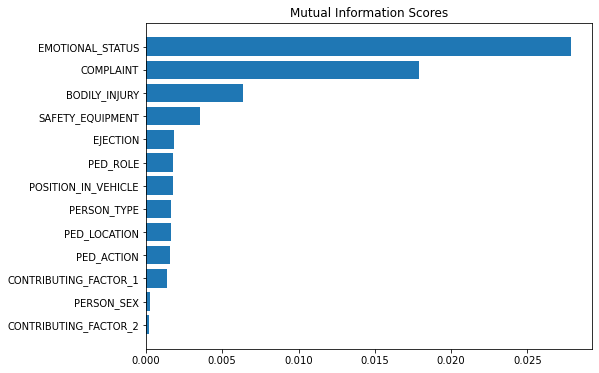

In [29]:
# plotting different Mutual Information scores as a barplot:
def plot_mi_scores(mi):
    mi = mi.sort_values(ascending=True)
    width = np.arange(len(mi))
    ticks = list(mi.index)
    plt.barh(width, mi)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(figsize=(8, 6))
plot_mi_scores(mi)

Mutual information (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other. If you knew the value of a feature, how much more confident would you be about the target?

From the above bar plot we see that knowledge about EMOTIONAL_STATUS will be the most certain while knowledge about CONTRIBUTING_FACTOR_2 will be the least certain in giving information about our target variable PERSON_INJURY.

### Computing Difference & Risk Ratio for Features:

Risk Ratios or relative risk, is a metric that measures the risk-taking place in a particular group and comparing the results with the risk-taking place in another group. 

Here it helps in finding which categories of features are more at getting Person Injury through colissions in NYC.

In [30]:
# Looking at the PERSON_INJURY rate – percentage of people getting injured in a collision as a mean of PERSON_INJURED column:
global_injury_rate = np.mean(df_full_train.PERSON_INJURY.value_counts(normalize=True))
round(global_injury_rate,2)

0.5

BODILY_INJURY


,mean,count,diff,risk
BODILY_INJURY,,,,
Abdomen - Pelvis,0.009259,648,-0.490741,0.018519
Back,0.000166,6009,-0.499834,0.000333
Chest,0.011244,1334,-0.488756,0.022489
Elbow-Lower-Arm-Hand,0.000000,2828,-0.500000,0.000000
Entire Body,0.018586,3013,-0.481414,0.037172
Eye,0.000000,75,-0.500000,0.000000
Face,0.000000,941,-0.500000,0.000000
Head,0.022273,5298,-0.477727,0.044545
Hip-Upper Leg,0.000000,1333,-0.500000,0.000000


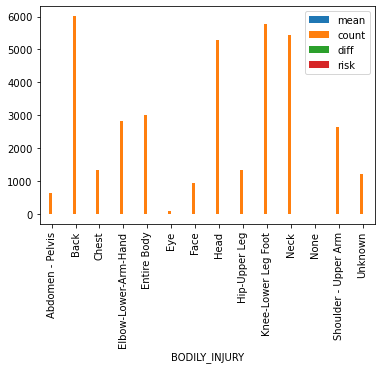

SAFETY_EQUIPMENT


,mean,count,diff,risk
SAFETY_EQUIPMENT,,,,
Air Bag Deployed,0.033493,209,-0.466507,0.066986
Air Bag Deployed/Child Restraint,0.000000,19,-0.500000,0.000000
Air Bag Deployed/Lap Belt,0.000000,106,-0.500000,0.000000
Air Bag Deployed/Lap Belt/Harness,0.017060,762,-0.482940,0.034121
Child Restraint Only,0.000000,385,-0.500000,0.000000
Harness,0.000000,92,-0.500000,0.000000
Helmet (Motorcycle Only),0.026344,949,-0.473656,0.052687
Helmet Only (In-Line Skater/Bicyclist),0.002370,844,-0.497630,0.004739
Helmet/Other (In-Line Skater/Bicyclist),0.003922,255,-0.496078,0.007843


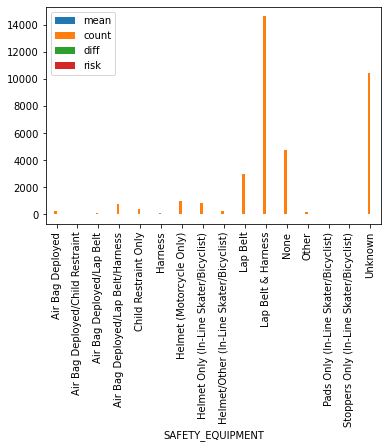

PERSON_SEX


,mean,count,diff,risk
PERSON_SEX,,,,
F,0.003681,14400,-0.496319,0.007361
M,0.007093,22135,-0.492907,0.014186


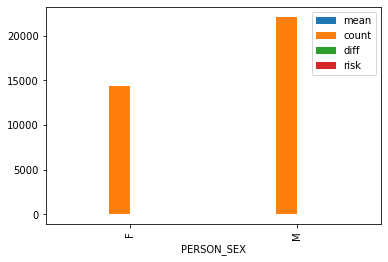

PERSON_TYPE


,mean,count,diff,risk
PERSON_TYPE,,,,
Bicyclist,0.003629,3582,-0.496371,0.007259
Occupant,0.003535,26310,-0.496465,0.007070
Other Motorized,0.006671,1499,-0.493329,0.013342
Pedestrian,0.018274,5144,-0.481726,0.036547


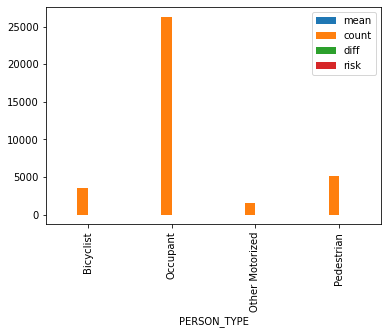

PED_LOCATION


,mean,count,diff,risk
PED_LOCATION,,,,
Pedestrian/Bicyclist/Other Pedestrian Not at Intersection,0.026419,1779,-0.473581,0.052839
Pedestrian/Bicyclist/Other Pedestrian at Intersection,0.013539,3176,-0.486461,0.027078
Unknown,0.003800,31580,-0.496200,0.007600


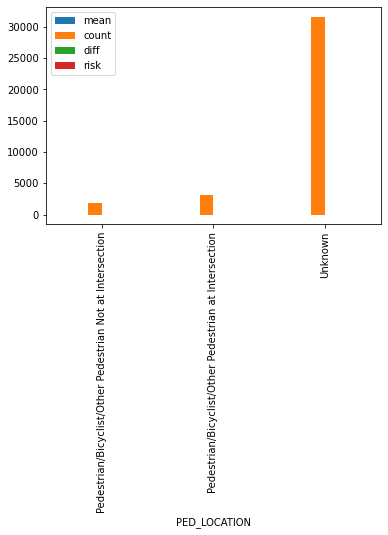

CONTRIBUTING_FACTOR_2


,mean,count,diff,risk
CONTRIBUTING_FACTOR_2,,,,
Aggressive Driving/Road Rage,0.000000,2,-0.500000,0.000000
Alcohol Involvement,0.000000,31,-0.500000,0.000000
Animals Action,0.000000,1,-0.500000,0.000000
Backing Unsafely,0.000000,2,-0.500000,0.000000
Cell Phone (hand-Held),0.000000,8,-0.500000,0.000000
Driver Inattention/Distraction,0.000000,68,-0.500000,0.000000
Driver Inexperience,0.000000,6,-0.500000,0.000000
Drugs (illegal),0.000000,3,-0.500000,0.000000
Eating or Drinking,0.000000,2,-0.500000,0.000000


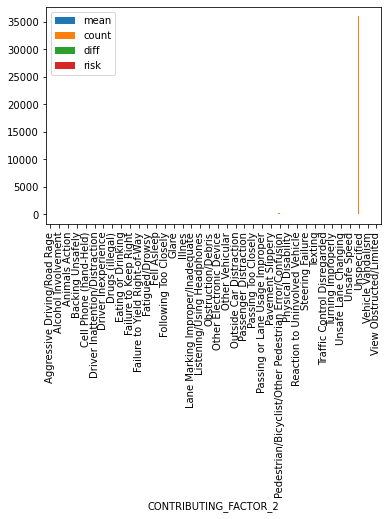

EJECTION


,mean,count,diff,risk
EJECTION,,,,
Ejected,0.026377,2161,-0.473623,0.052753
Not Ejected,0.004274,33690,-0.495726,0.008549
Partially Ejected,0.001642,609,-0.498358,0.003284
Trapped,0.106667,75,-0.393333,0.213333


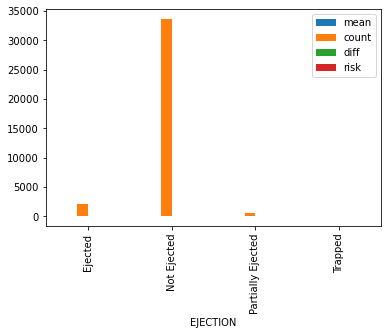

COMPLAINT


,mean,count,diff,risk
COMPLAINT,,,,
Abrasion,0.000000,1337,-0.500000,0.000000
Amputation,0.142857,7,-0.357143,0.285714
Complaint of Pain or Nausea,0.000357,22403,-0.499643,0.000714
Concussion,0.003774,265,-0.496226,0.007547
Contusion - Bruise,0.000000,1791,-0.500000,0.000000
Crush Injuries,0.270270,148,-0.229730,0.540541
Fracture - Distorted - Dislocation,0.001351,740,-0.498649,0.002703
Internal,0.241584,505,-0.258416,0.483168
Minor Bleeding,0.001382,2171,-0.498618,0.002764


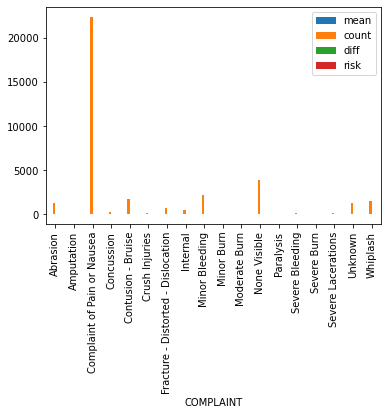

EMOTIONAL_STATUS


,mean,count,diff,risk
EMOTIONAL_STATUS,,,,
Apparent Death,1.000000,141,0.500000,2.000000
Conscious,0.000385,33724,-0.499615,0.000771
Incoherent,0.000000,150,-0.500000,0.000000
Semiconscious,0.008850,226,-0.491150,0.017699
Shock,0.001003,997,-0.498997,0.002006
Unconscious,0.206478,247,-0.293522,0.412955
Unknown,0.001905,1050,-0.498095,0.003810


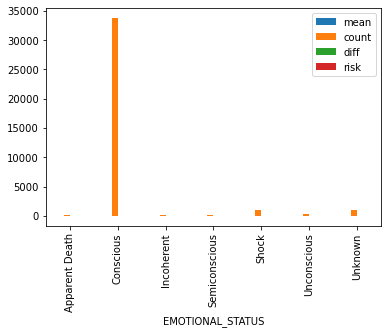

CONTRIBUTING_FACTOR_1


,mean,count,diff,risk
CONTRIBUTING_FACTOR_1,,,,
Aggressive Driving/Road Rage,0.000000,7,-0.500000,0.000000
Alcohol Involvement,0.013333,75,-0.486667,0.026667
Animals Action,0.000000,2,-0.500000,0.000000
Backing Unsafely,0.000000,10,-0.500000,0.000000
Brakes Defective,0.000000,1,-0.500000,0.000000
Cell Phone (hand-Held),0.000000,19,-0.500000,0.000000
Cell Phone (hands-free),0.000000,2,-0.500000,0.000000
Driver Inattention/Distraction,0.000000,167,-0.500000,0.000000
Driver Inexperience,0.000000,2,-0.500000,0.000000


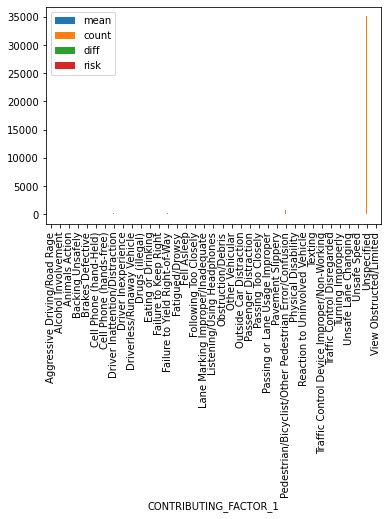

POSITION_IN_VEHICLE


,mean,count,diff,risk
POSITION_IN_VEHICLE,,,,
"Any person in the rear of a station wagon, pick-up truck, all passengers on a bus, etc",0.000000,341,-0.500000,0.000000
Driver,0.004451,20892,-0.495549,0.008903
"Front passenger, if two or more persons, including the driver, are in the front seat",0.002795,4293,-0.497205,0.005590
If one person is seated on another person&apos;s lap,0.000000,22,-0.500000,0.000000
"Left rear passenger, or rear passenger on a bicycle, motorcycle, snowmobile",0.001005,1991,-0.498995,0.002009
"Middle front seat, or passenger lying across a seat",0.000000,351,-0.500000,0.000000
"Middle rear seat, or passenger lying across a seat",0.003704,540,-0.496296,0.007407
Riding/Hanging on Outside,0.009756,410,-0.490244,0.019512
Right rear passenger or motorcycle sidecar passenger,0.001351,2220,-0.498649,0.002703


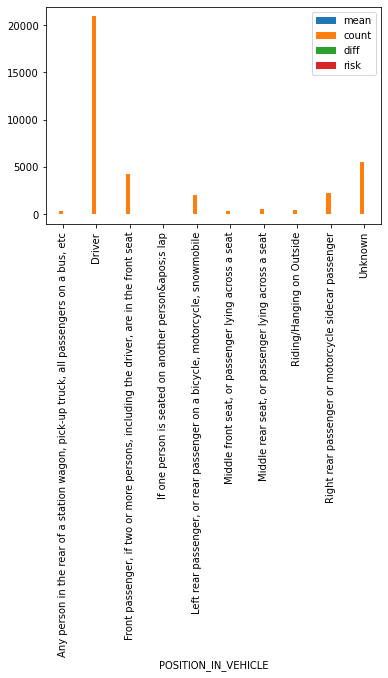

PED_ROLE


,mean,count,diff,risk
PED_ROLE,,,,
Driver,0.004561,21266,-0.495439,0.009123
In-Line Skater,0.000000,21,-0.500000,0.000000
Other,0.000000,105,-0.500000,0.000000
Passenger,0.001900,9999,-0.498100,0.003800
Pedestrian,0.018274,5144,-0.481726,0.036547


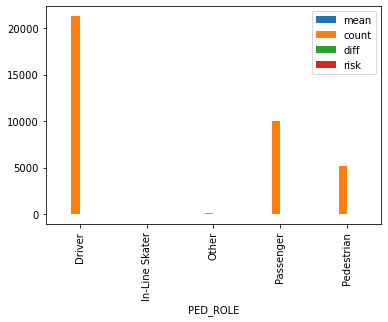

PED_ACTION


,mean,count,diff,risk
PED_ACTION,,,,
Crossing Against Signal,0.036585,328,-0.463415,0.073171
Crossing With Signal,0.008534,1992,-0.491466,0.017068
"Crossing, No Signal, Marked Crosswalk",0.011820,423,-0.488180,0.023641
"Crossing, No Signal, or Crosswalk",0.018478,920,-0.481522,0.036957
Emerging from in Front of/Behind Parked Vehicle,0.011765,170,-0.488235,0.023529
Getting On/Off Vehicle Other Than School Bus,0.000000,84,-0.500000,0.000000
Going to/From Stopped School Bus,0.000000,5,-0.500000,0.000000
Not in Roadway,0.025237,317,-0.474763,0.050473
Other Actions in Roadway,0.038369,417,-0.461631,0.076739


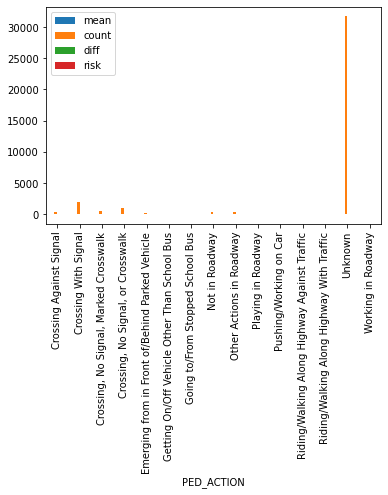

In [31]:
from IPython.display import display  # helps display each loop output not just last one

# creating a copy of df_full_train subset:
df_full_train_copy = df_full_train.copy()

# Encode string class values of target variable PERSON_INJURY column as integers - using LabelEncoder():
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_full_train_copy['PERSON_INJURY'] = label_encoder.fit_transform(df_full_train_copy.PERSON_INJURY)

# converting target column values to numerical:
#df_full_train_copy['PERSON_INJURY'].replace({'Killed':0,'Injured':1},inplace=True)

# Replicating above calculations of Difference and Risk Ratio for each column of categorical variables in dataset 
# - using for loop:
for c in categorical:
    print(c)
    # Step 1 - grouping the PERSON_INJURY by different categories and aggregting to get average and count for each subgroup:
    df_group = df_full_train_copy.groupby(c).PERSON_INJURY.agg(['mean','count'])
    
    # Step 2 - calculating the difference between global injury rate and each group injury value as a column 'diff' in df:
    df_group['diff'] = df_group['mean'] - global_injury_rate   # mean gives us the stroke rate for each category

    # Step 3 - caluclating the Risk ratio for each group injury value as a column 'risk' in df:
    df_group['risk'] = df_group['mean'] / global_injury_rate

    # printing whold df:
    display(df_group)
    print()   # adding line breaks between loops
   
    df_group.plot.bar()
    plt.show()

Above calculations show interesting facts about those injured or killed in NYC collisions - like people with Lap Belt & Harness as safety equipment, Occupants of vehicles, those in Driver seat or those who could Not Eject were more likely to get injured.

Most people post collision Complained of Pain or Nausea, were Conscious

These facts would further help us find categories or variables which would make predictions about Person's Injury status after a collision using ML algorithms.

## Model Selection, Evaluation & Parameter Tuning - 

After splitting the stroke prediction dataset, identifying the feature matrix and target variable its time for model selection and evaluation. As the target variable was binary (0 and 1) I used different Supervised Learning algorithms for Classification on the dataset.

All the categorical features were encoded using DictVectorizer to be used further in training different models and making predictions. DictVectorizer helped in transforming lists of feature-value mappings to vectors i.e., feature matrix into dictionaries for training and predicting on subsets.

While using different models I also tuned each model with its different parameters so as to improve model performance and optimize predictions. Then the final model with most optimal parameter is selected for each model type. 

In [32]:
# Converting the CRASH_DATE column as a Timestamp and converting it into an integer data type in all 3 subsets :
df_train['CRASH_DATE'] = df_train['CRASH_DATE'].map(pd.Timestamp.timestamp).astype(int)
df_val['CRASH_DATE'] = df_val['CRASH_DATE'].map(pd.Timestamp.timestamp).astype(int)
df_test['CRASH_DATE'] = df_test['CRASH_DATE'].map(pd.Timestamp.timestamp).astype(int)

### Model 1 - Logistic Regression 

Let’s start with logistic regression which uses a logistic function to predict a binary dependent variable. Let’s define a logistic regression object, fit our model, and evaluate performance:

In [75]:
# Importing necessary libraries for the model:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# Intitiating the model and training it on our full train subset:
lr = LogisticRegression(random_state=1)

# Turning training subset df into a list of dictionaries:
train_dicts = df_train.to_dict(orient='records')

# Turning list of dictionaries into feature matrix
# training our DictVectorizer instance:
dv = DictVectorizer(sparse=False)

# fitting and transforming the full_train subset:
X_train = dv.fit_transform(train_dicts)   

# Combined fit and transform dictionary - for validation dataset:
val_dicts = df_val.to_dict(orient='records')

# only transforming DictVectorizer on the validation set:
X_val = dv.transform(val_dicts)

# Fitting the model to the training set:
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [32]:
# Computing prediction probability on training set:
y_pred_train = lr.predict_proba(X_train)[:,1]

# Computing prediction probability on validation set:
y_pred = lr.predict_proba(X_val)[:, 1]

# computing the auc score on training set:
print('AUC train Log_Reg: %.5f' % roc_auc_score(y_train, y_pred_train))

# computing the auc score on validation set:
print('AUC val Log_Reg: %.5f' % roc_auc_score(y_val, y_pred))

AUC train Log_Reg: 0.51579
AUC val Log_Reg: 0.52060


We can see above that the AUC score from Logistic Regression on both the training and validation set is very poor at around 52%.

##### Scores for Logistic Regression:

In [33]:
y_pred = lr.predict(X_val)

# confusion matrix - Logistic Regression:
matrix = confusion_matrix(y_val, y_pred, labels=['Killed','Injured'])
print('Confusion matrix Log_Reg: \n',matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_val, y_pred, labels=['Killed','Injured']).reshape(-1)
print('Outcome values Log_Reg: \n', tp, fn, fp, tn)                                  
# classification report for precision, recall f1-score and accuracy
clf_matrix = classification_report(y_val, y_pred, labels=['Killed','Injured'])
print('Classification report Log_Reg: \n',clf_matrix)

Confusion matrix Log_Reg: 
 [[   0   61]
 [   0 9073]]
Outcome values Log_Reg: 
 0 61 0 9073


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report Log_Reg: 
               precision    recall  f1-score   support

      Killed       0.00      0.00      0.00        61
     Injured       0.99      1.00      1.00      9073

    accuracy                           0.99      9134
   macro avg       0.50      0.50      0.50      9134
weighted avg       0.99      0.99      0.99      9134



D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Feature Importance for Logistic Regression:

In [34]:
## Summarizing feature importance -
# Joining the feature_names with respective coefficients - using zip function:
feature_weights = dict(zip(dv.get_feature_names(), lr.coef_[0].round(3)))

# Sorting feature coefficients in descending order:
import operator
sorted_d = dict(sorted(feature_weights.items(), key=operator.itemgetter(1),reverse=True))
sorted_d

{'BODILY_INJURY=Abdomen - Pelvis': 0.0,
 'BODILY_INJURY=Back': -0.0,
 'BODILY_INJURY=Chest': 0.0,
 'BODILY_INJURY=Elbow-Lower-Arm-Hand': -0.0,
 'BODILY_INJURY=Entire Body': 0.0,
 'BODILY_INJURY=Eye': -0.0,
 'BODILY_INJURY=Face': -0.0,
 'BODILY_INJURY=Head': 0.0,
 'BODILY_INJURY=Hip-Upper Leg': -0.0,
 'BODILY_INJURY=Knee-Lower Leg Foot': -0.0,
 'BODILY_INJURY=Neck': -0.0,
 'BODILY_INJURY=None': 0.0,
 'BODILY_INJURY=Shoulder - Upper Arm': -0.0,
 'BODILY_INJURY=Unknown': -0.0,
 'COMPLAINT=Abrasion': -0.0,
 'COMPLAINT=Amputation': 0.0,
 'COMPLAINT=Complaint of Pain or Nausea': -0.0,
 'COMPLAINT=Concussion': -0.0,
 'COMPLAINT=Contusion - Bruise': -0.0,
 'COMPLAINT=Crush Injuries': 0.0,
 'COMPLAINT=Fracture - Distorted - Dislocation': -0.0,
 'COMPLAINT=Internal': 0.0,
 'COMPLAINT=Minor Bleeding': -0.0,
 'COMPLAINT=Minor Burn': -0.0,
 'COMPLAINT=Moderate Burn': -0.0,
 'COMPLAINT=None Visible': -0.0,
 'COMPLAINT=Paralysis': -0.0,
 'COMPLAINT=Severe Bleeding': 0.0,
 'COMPLAINT=Severe Burn': -0.

When computing feature importance for Logisitic Regression none of the features appear to be more important for predicting a Person's Injury.

### Model 2 - Decision Trees for Classification

Let’s use a Tree-based model Decision Tree for Classification to predict our binary dependent variable. These algorithms make predictions by going through each and every feature in the data set, one-by-one. 

Let's define a decision tree classifier object, fit our model, and evaluate performance:

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1)     # max_depth ----> default = None

# Fitting the model to the training set:
dt.fit(X_train, y_train)

# Computing prediction probability on training set:
y_pred_train_dt = dt.predict_proba(X_train)[:,1]

# Computing prediction probability on validation set:
y_pred_dt = dt.predict_proba(X_val)[:, 1]

# computing the auc score on training set:
print('AUC train Decs_Tree: %.5f' % roc_auc_score(y_train, y_pred_train_dt))

# computing the auc score on validation set:
print('AUC val Decs_Tree: %.5f' % roc_auc_score(y_val, y_pred_dt))

AUC train Decs_Tree: 1.00000
AUC val Decs_Tree: 0.90912


The AUC score from Decision Tree for Classification on training set is 100% while on validation set is around 91%.

This appears to be an Overfitting problem as the model outperforms on training or seen data, but works poorly on new data. In decision trees, over-fitting occurs when the tree is designed so as to perfectly fit all samples in the training set. I will try to overcome this problem during parameter tuning by pruning the tree using max_depth etc.

##### Scores for Decision Tree:

In [36]:
y_pred_dt = dt.predict(X_val)

# confusion matrix - Decision Trees:
matrix2 = confusion_matrix(y_val, y_pred_dt, labels=['Killed','Injured'])
print('Confusion matrix Decs_Tree: \n',matrix2)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_val, y_pred_dt, labels=['Killed','Injured']).reshape(-1)
print('Outcome values Decs_Tree: \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
clf_matrix2 = classification_report(y_val, y_pred_dt, labels=['Killed','Injured'])
print('Classification report Decs_Tree: \n',clf_matrix2)

Confusion matrix Decs_Tree: 
 [[  50   11]
 [  13 9060]]
Outcome values Decs_Tree: 
 50 11 13 9060
Classification report Decs_Tree: 
               precision    recall  f1-score   support

      Killed       0.79      0.82      0.81        61
     Injured       1.00      1.00      1.00      9073

    accuracy                           1.00      9134
   macro avg       0.90      0.91      0.90      9134
weighted avg       1.00      1.00      1.00      9134



##### Feature Importance for Decision Tree:

In [37]:
## Summarize feature importance
# get importance and respective feature names as a dictionary:
importance = dt.feature_importances_
feature_imp = dict(zip(dv.get_feature_names(), importance.round(3)))

# sorting feature coefficients in descending order:
import operator
sorted_d2 = dict( sorted(feature_imp.items(), key=operator.itemgetter(1),reverse=True))
sorted_d2

{'EMOTIONAL_STATUS=Apparent Death': 0.663,
 'EMOTIONAL_STATUS=Unconscious': 0.049,
 'COMPLAINT=Internal': 0.042,
 'PERSON_AGE': 0.042,
 'CRASH_DATE': 0.04,
 'SAFETY_EQUIPMENT=None': 0.015,
 'CONTRIBUTING_FACTOR_1=Pedestrian/Bicyclist/Other Pedestrian Error/Confusion': 0.009,
 'EJECTION=Not Ejected': 0.008,
 'SAFETY_EQUIPMENT=Air Bag Deployed': 0.008,
 'COMPLAINT=Crush Injuries': 0.007,
 'CRASH_Mnth_Name=May': 0.007,
 'PED_LOCATION=Pedestrian/Bicyclist/Other Pedestrian Not at Intersection': 0.007,
 'BODILY_INJURY=Entire Body': 0.006,
 'COMPLAINT=Minor Bleeding': 0.006,
 'CONTRIBUTING_FACTOR_1=Other Vehicular': 0.006,
 'PED_ACTION=Not in Roadway': 0.006,
 'PERSON_SEX=F': 0.006,
 'POSITION_IN_VEHICLE=Riding/Hanging on Outside': 0.006,
 'POSITION_IN_VEHICLE=Right rear passenger or motorcycle sidecar passenger': 0.006,
 'CRASH_TIME=23:00': 0.005,
 'SAFETY_EQUIPMENT=Lap Belt': 0.005,
 'BODILY_INJURY=Head': 0.004,
 'COMPLAINT=Complaint of Pain or Nausea': 0.004,
 'CRASH_TIME=10:00': 0.004,
 '

Above Feature Importance values from Decision Tree Classifier shows that feature like - EMOTIONAL_STATUS, COMPLAINT, PERSON_AGE appear to be the most important for making predictions using this algorithm.

### Model 3 - Random Forest for Classification (using Ensemble learning)

Next let's use an Ensemble model Random Forest for Classification to predict our binary dependent variable. Random forests are a collection of decision trees being grouped together and trained together that use random orders of the features in the dataset. 

Let's define a random forest classifier object, fit our model, and evaluate performance:

In [38]:
    from sklearn.ensemble import RandomForestClassifier

# training our Random Forest for classification:
rf = RandomForestClassifier(random_state=1)    # n_estimtors ---> default=100

# Fitting the model to the training set:
rf.fit(X_train, y_train)

# Computing the prediction probability on training dataset:
y_pred_train_rf = rf.predict_proba(X_train)[:,1]

# Computing the prediction probability on validation dataset:
y_pred_rf = rf.predict_proba(X_val)[:,1]

# computing the auc score on training dataset:
print('AUC train Rand_Forest: %.5f' % roc_auc_score(y_train, y_pred_train_rf))

# computing the auc score on validation dataset:
print('AUC val Rand_Forest: %.5f' % roc_auc_score(y_val, y_pred_rf))

AUC train Rand_Forest: 1.00000
AUC val Rand_Forest: 0.98068


The AUC score from Random Forest for Classification on training set is 100% while on validation set is around 98%.
The Overfitting problem might not be there, as the model outperforms on training or seen data, but almost equally well on new data also. 

Random Forest Classifier model has improved the perfmormance over Decision Tree Classifier from 91% to 98% on validation set. 

##### Scores for Random Forest:

In [39]:
y_pred_rf = rf.predict(X_val)

# confusion matrix - Decision Trees:
matrix3 = confusion_matrix(y_val, y_pred_rf, labels=['Killed','Injured'])
print('Confusion matrix Rand_Forest: \n',matrix3)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_val, y_pred_rf, labels=['Killed','Injured']).reshape(-1)
print('Outcome values Rand_Forest: \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
clf_matrix3 = classification_report(y_val, y_pred_rf, labels=['Killed','Injured'])
print('Classification report Rand_Forest: \n',clf_matrix3)

Confusion matrix Rand_Forest: 
 [[  45   16]
 [   0 9073]]
Outcome values Rand_Forest: 
 45 16 0 9073
Classification report Rand_Forest: 
               precision    recall  f1-score   support

      Killed       1.00      0.74      0.85        61
     Injured       1.00      1.00      1.00      9073

    accuracy                           1.00      9134
   macro avg       1.00      0.87      0.92      9134
weighted avg       1.00      1.00      1.00      9134



##### Feature Importance for Random Forest:

In [40]:
## Summarize feature importance
# get importance and respective feature names as a dictionary:
importance = rf.feature_importances_
feature_imp_rf = dict(zip(dv.get_feature_names(), importance.round(3)))

# sorting feature coefficients in descending order:
import operator
sorted_d3 = dict( sorted(feature_imp_rf.items(), key=operator.itemgetter(1),reverse=True))
sorted_d3

{'EMOTIONAL_STATUS=Apparent Death': 0.325,
 'COMPLAINT=Internal': 0.08,
 'PERSON_AGE': 0.052,
 'EMOTIONAL_STATUS=Conscious': 0.046,
 'CRASH_DATE': 0.043,
 'EMOTIONAL_STATUS=Unconscious': 0.034,
 'COMPLAINT=Crush Injuries': 0.024,
 'BODILY_INJURY=Head': 0.015,
 'BODILY_INJURY=Entire Body': 0.013,
 'PERSON_SEX=F': 0.009,
 'COMPLAINT=Complaint of Pain or Nausea': 0.008,
 'COMPLAINT=Severe Bleeding': 0.008,
 'EJECTION=Ejected': 0.008,
 'EMOTIONAL_STATUS=Shock': 0.008,
 'SAFETY_EQUIPMENT=Helmet (Motorcycle Only)': 0.008,
 'CONTRIBUTING_FACTOR_1=Pedestrian/Bicyclist/Other Pedestrian Error/Confusion': 0.007,
 'EJECTION=Not Ejected': 0.007,
 'EMOTIONAL_STATUS=Semiconscious': 0.007,
 'PERSON_SEX=M': 0.007,
 'CRASH_Mnth_Name=Aug': 0.006,
 'CRASH_Mnth_Name=May': 0.006,
 'CRASH_TIME=3:00': 0.006,
 'SAFETY_EQUIPMENT=Air Bag Deployed': 0.006,
 'SAFETY_EQUIPMENT=None': 0.006,
 'BODILY_INJURY=Chest': 0.005,
 'CRASH_Mnth_Name=Apr': 0.005,
 'CRASH_Mnth_Name=Jul': 0.005,
 'CRASH_Mnth_Name=Sep': 0.005,
 '

Feature Importance values from Random Forest Classifier shows that feature like - EMOTIONAL_STATUS, COMPLAINT, PERSON_AGE appear to be the most important for making predictions about Injuries during NYC collisions using this algorithm.

This is quite similar to the values computed using the Decision Tree Classifier as well.

### Tuning Model Hyperparameters - Using Grid Search Cross Validation:

In [84]:
# Importing the necessary library to perform GridSearchCV:
from sklearn.model_selection import GridSearchCV

def model_tuning(model,param_dict):
    
    """Function to tune the hyperparamters of a Model using Grid Search Cross Validation"""
    
    # Inspecting the hyperparameters for the chosen Model:
    model.get_params()
    
    # Defining the grid or combination of parameters that we want to test out on the chosen Model:
    model_grid = param_dict
    
    # Instantiating a GridSearchCV object on the Model with scoring parameter set to ‘roc_auc’ for roc_auc_score and 
    # cross-validation folds set to 5:
    grid_model = GridSearchCV(estimator=model, param_grid=model_grid, cv=5, scoring='roc_auc') 
    # scoring means the metric to optimize

    # Fitting the grid_model to the training set:
    grid_model.fit(X_train, y_train)
    
    # Extracting the best estimator, score and parameters from the model and printing them:
    print("Results from GridSearchCV on", model.__class__.__name__)  

    # Estimator which gave highest score (or smallest loss if specified) on the left out data:
    print("Best Estimator:\n",grid_model.best_estimator_)

    # Mean cross-validated score of the best_estimator:
    print("\n Best Score:\n",grid_model.best_score_)

    # Parameter setting that gave the best results on the hold out data:
    print("\n Best Hyperparameters:\n",grid_model.best_params_)
    
    # Extracting best model from the grid:
    best_model_grid = grid_model.best_estimator_

    # Predicting the validation set labels:
    y_pred = best_model_grid.predict_proba(X_val)[:,1]

    # Evaluating the AUC on validation set:
    AUC_val = roc_auc_score(y_val, y_pred)

    # Printing the Metrics after Tuning the model and predicting with best parameters:
    print('\n Classification Metrices on Tuned Model:')
    print('AUC Val of Best Model: {:.2f}'.format(AUC_val))

#### Decision Tree Classifier Tuning - using GridSearchCV:

Below were some parameters tuned for Decision Tree Classifier:-

* max_depth - The maximum depth of the tree.
* min_samples_leaf - The minimum number of samples required to be at a leaf node.
* max_features - The number of features to consider when looking for the best split.

In [71]:
# Defining a grid of hyperparameters for Decision Tree Classifier Model:
params_dt = {'max_depth': [3, 4, 5],
            'min_samples_leaf': [10, 20, 50, 100],
            'max_features' : [2, 6, 8, 10]}

# Calling the model tuning function with requisite Model argument:
model_tuning(DecisionTreeClassifier(random_state=1),params_dt)

Results from GridSearchCV on DecisionTreeClassifier
Best Estimator:
 DecisionTreeClassifier(max_depth=5, max_features=10, min_samples_leaf=20,
                       random_state=1)

 Best Score:
 0.9425701043180265

 Best Hyperparameters:
 {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 20}

 Classification Metrices on Tuned Model:
AUC Val of Best Model: 0.91


Combining all 3 parameters we see that **max_depth = 5, min_sample_leaf = 20 and max_features = 10** gives us the best **AUC score of 0.91 or 91%** for Decision Tree Classifier.

##### Final Decision Tree Model -

Below is the final Decision Tree Classifier with most optimal parameters for the NYC Motor vehicle Collision dataset.

* max_depth = 5
* min_samples_leaf = 20
* max_features = 10

In [74]:
# using the most optimal parameters to train our final Decision tree model:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, max_features = 10, random_state=1)

# training our train set with above optimal parameters:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=10, min_samples_leaf=20,
                       random_state=1)

Visualizing our most optimal Decision Tree -

In [75]:
from sklearn.tree import export_text

print(export_text(dt, feature_names=dv.get_feature_names()))  # when dt has max_depth = 5

|--- SAFETY_EQUIPMENT=Lap Belt & Harness <= 0.50
|   |--- EMOTIONAL_STATUS=Apparent Death <= 0.50
|   |   |--- PED_ACTION=Unknown <= 0.50
|   |   |   |--- CRASH_TIME=5:00 <= 0.50
|   |   |   |   |--- EMOTIONAL_STATUS=Conscious <= 0.50
|   |   |   |   |   |--- class: Injured
|   |   |   |   |--- EMOTIONAL_STATUS=Conscious >  0.50
|   |   |   |   |   |--- class: Injured
|   |   |   |--- CRASH_TIME=5:00 >  0.50
|   |   |   |   |--- class: Injured
|   |   |--- PED_ACTION=Unknown >  0.50
|   |   |   |--- CONTRIBUTING_FACTOR_1=Unspecified <= 0.50
|   |   |   |   |--- class: Injured
|   |   |   |--- CONTRIBUTING_FACTOR_1=Unspecified >  0.50
|   |   |   |   |--- PERSON_SEX=M <= 0.50
|   |   |   |   |   |--- class: Injured
|   |   |   |   |--- PERSON_SEX=M >  0.50
|   |   |   |   |   |--- class: Injured
|   |--- EMOTIONAL_STATUS=Apparent Death >  0.50
|   |   |--- class: Killed
|--- SAFETY_EQUIPMENT=Lap Belt & Harness >  0.50
|   |--- CRASH_Mnth_Name=Oct <= 0.50
|   |   |--- CRASH_TIME=20:00 <=

#### Random Forest Classifier Tuning - using GridSearchCV:

Below were some parameters tuned for Random Forest Classifier:-

* n_estimators - The number of trees in the forest.
* max_depth - The maximum depth of the tree.
* min_samples_leaf - The minimum number of samples required to be at a leaf node.
* max_features - The number of features to consider when looking for the best split.

In [70]:
# Defining a grid of hyperparameters for Random Forest Classifier Model:
params_rf = {'n_estimators': [10, 50, 70, 120], 
            'max_depth': [5, 10, 15],
            'min_samples_leaf': [1, 5, 10, 20],
            'max_features' : [2,6,8,10]}

# Calling the model tuning function with requisite Model argument:
model_tuning(RandomForestClassifier(random_state=1),params_rf)

Results from GridSearchCV on RandomForestClassifier
Best Estimator:
 RandomForestClassifier(max_depth=15, max_features=8, n_estimators=70,
                       random_state=1)

 Best Score:
 0.9948480428233217

 Best Hyperparameters:
 {'max_depth': 15, 'max_features': 8, 'min_samples_leaf': 1, 'n_estimators': 70}

 Classification Metrices on Tuned Model:
AUC Val of Best Model: 0.99


Combining all 4 parameters we see that **max_depth = 15, min_sample_leaf = 1, and n_estimators = 70 and max_features = 8** gives us the best **AUC score of 99%** for Random Forest Classifier.

This is definitely a better score from tuned Random Forest Classifier compared to the one from tuned Decision Tree Classifier.

##### Final Random Forest Model -

Below is the final Random Forest Classifier with most optimal parameters for our dataset.

* max_depth = 15
* min_samples_leaf = 1
* max_features = 8
* n_estimators = 70

In [76]:
# using the most optimal parameters to train our final Random Forest model:
rf = RandomForestClassifier(max_depth=15, min_samples_leaf=1, max_features = 8, n_estimators = 70, random_state =1)

# training our train set with above optimal parameters:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_features=8, n_estimators=70,
                       random_state=1)

### Model 4 - XGBoost for Classification (using Gradient boosting)

Moving further, let's use an Gradient Boosting model eXtreme Gradient Boosting (XGBoost) for Classification to predict our binary dependent variable. It is a decision tree based machine learning algorithm which uses a process called boosting to help improve performance. 

Let's define a XGboost classifier object, fit our model, and evaluate performance:

In [110]:
# importing the necessary libraries and assigning the feature names to a variable:
import xgboost as xgb

features = dv.get_feature_names()

# encode string class values of target variables y_train and y_val as integers:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder_y = label_encoder.fit_transform(y_train)
label_encoder_y_val = label_encoder.fit_transform(y_val)

# Step 1 - wrapping our training data into a special data structure internal to XGBoost called DMatrix. It allows XGboost to train faster.
# for training set:
dtrain = xgb.DMatrix(X_train, label = label_encoder_y, feature_names = features)

# for validation set:
dval = xgb.DMatrix(X_val, label = label_encoder_y_val, feature_names = features)

In [111]:
# Step 2 - training the model - 
xgb_params = {'objective': 'binary:logistic',
             'nthread': 8,
             'seed': 1,'eval_metric':'auc'}  # default eta = 0.3, max_depth = 6

# binary:logistic: logistic regression for binary classification, output probability
# eval_metric - Evaluation metrics for validation data
# When used with binary classification, the objective should be binary:logistic or similar functions that work on probability.
# nthread - Number of parallel threads used to run XGBoost

model = xgb.train(xgb_params, dtrain) 

In [112]:
# making predictions and evaluating the score on training and validation set:
y_pred_train_xgb = model.predict(dtrain)
y_pred_xgb = model.predict(dval)

print('AUC train XGB_Clasfr: %.5f' % roc_auc_score(y_train, y_pred_train_xgb))
print('AUC val XGB_Clasfr: %.5f' % roc_auc_score(y_val, y_pred_xgb))

AUC train XGB_Clasfr: 0.97924
AUC val XGB_Clasfr: 0.96617


We can see above that the AUC score from XGboost Classifier on our training set is approx. 98% while on validation set is 97%. 

The score on validation set has greatly improved from 52% in Logistic Regression and from 91% in Decision Trees however, declined from Random Forest score of 98-99%.

#### XGBoost Classifier Tuning - using GridSearchCV:

Below were some parameters tuned for XGBoost Classifier:-

* eta - Boosting learning rate (xgb’s “eta”).
* max_depth - Maximum tree depth for base learners.
* min_child_weight - Minimum sum of instance weight(hessian) needed in a child.

In [115]:
# Defining a grid of hyperparameters for XGBoost Classifier Model:
params_xgb = {'eta': [0.1, 0.5, 1.0], 
            'max_depth': [3,4,5],
            'min_child_weight': [1, 10, 15, 20]}

# Calling the model tuning function with requisite Model argument:
model_tuning(xgb.XGBClassifier(random_state=1),params_xgb)

D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:19:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:19:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:19:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:19:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:19:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:20:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:20:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:20:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:20:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:20:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:20:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:20:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:21:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:21:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:21:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:21:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:21:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:21:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:21:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:22:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:22:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:22:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:22:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:23:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:23:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:23:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:23:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:24:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:24:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:24:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:24:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:25:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:25:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:25:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:25:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:25:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:27:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:27:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:27:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:27:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:28:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:28:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:28:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:29:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:29:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:29:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:29:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:30:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:30:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:30:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:30:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:31:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:31:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:31:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:31:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:31:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:31:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:32:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:32:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:32:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:32:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:32:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:32:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:32:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:33:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:33:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:33:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:33:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:33:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:33:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:34:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:34:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:34:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:34:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:34:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:34:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:38:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:38:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:38:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:38:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:38:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:38:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:39:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:39:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:39:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:39:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:39:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:40:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:40:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:40:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:40:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:40:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:41:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:41:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:41:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:42:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:42:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:42:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:42:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:42:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:42:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:43:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:43:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:43:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:43:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:43:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:43:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:43:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:44:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:44:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:44:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:44:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:44:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:44:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:44:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:44:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:45:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:45:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:45:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:45:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:45:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:45:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:46:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:46:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:46:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:46:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:46:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:47:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:47:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:47:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:47:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:47:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:47:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:48:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:49:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:49:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:49:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:49:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:50:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:50:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:50:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:51:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:51:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:51:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:51:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:52:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:52:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:52:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:53:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:53:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:53:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:53:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:55:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:55:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results from GridSearchCV on XGBClassifier
Best Estimator:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.5, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

 Best Score:
 0.993387334428632

 Best Hyperparameters:
 {'eta': 0.5, 'max_depth': 4, 'min_child_weight'

Combining all 3 parameters we see that **max_depth = 4, min_child_weight = 1 and eta = 0.5** gives us the best **AUC score of 99%** for XGBoost Classifier.

This is a score similar to that from tuned Random Forest and better from tuned Decision Tree Classifier model.

##### Final XGBoost Model -

Below is the final XGBoost classifier with most optimal parameters for the NYC Collision dataset.
(training for 200 iterations)

* eta = 0.5
* max_depth = 4
* min_child_weight = 1  

In [116]:
# using the most optimal parameters to train our final XGBoost Classifier model:
xgb_params = {'eta': 0.5, 
              'max_depth': 4, 
              'min_child_weight': 1,
             'objective': 'binary:logistic',
              'eval_metric':'auc',
              
             'nthread': 8,
             'seed': 1,
             'verbosity': 1}


# training our train set with above optimal parameters:
model = xgb.train(xgb_params, dtrain, num_boost_round=200)
model

## Selecting the Best Model for our Dataset - 

Once the final models with most optimal parameters are finalized for each algorithm we use them to select the Best model for our NYC Collision dataset.

####  Comparing between Decision tree, Random forest and XGBoost for Classification models - 

In [123]:
# Final Model 1 - Using the Final Decision Tree Classifier -
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, max_features = 10, random_state=1)

# training our train set with above optimal parameters:
dt.fit(X_train, y_train)

# Evaluating Decison tree's performance - 
y_pred = dt.predict_proba(X_val)[:,1]
print('AUC on val (tuned) Decs_Tree: %.3f' % (roc_auc_score(y_val, y_pred)))

AUC on val (tuned) Decs_Tree: 0.912


In [124]:
# Final Model 2 - Using the Final Random Forest Classifier -
rf = RandomForestClassifier(max_depth=15, min_samples_leaf=1, max_features = 8, n_estimators = 70, random_state =1)

# training our train set with above optimal parameters:
rf.fit(X_train, y_train)

# Evaluating Random Forest's performance - 
y_pred = rf.predict_proba(X_val)[:,1]
print('AUC on val (tuned) Rand_Forest: %.3f' % roc_auc_score(y_val, y_pred))

AUC on val (tuned) Rand_Forest: 0.992


In [125]:
# Final Model 3 - Using the Final XGBoost Classifier -
xgb_params = {'eta': 0.5, 
              'max_depth': 4, 
              'min_child_weight': 1,
             'objective': 'binary:logistic',
              'eval_metric':'auc',
              
             'nthread': 8,
             'seed': 1,
             'verbosity': 1}


# training our train set with above optimal parameters:
model = xgb.train(xgb_params, dtrain, num_boost_round=200)

# Evaluating XGBoost's performance - 
y_pred = model.predict(dval)
print('AUC on val (tuned) XGB_Clasfr: %.3f' % roc_auc_score(y_val, y_pred))

AUC on val (tuned) XGB_Clasfr: 0.991


We see from above AUC scores on validation set for both **Random Forest & XGBoost for Classification** give us the ***best AUC score of 99%***

Next, we would use both models on testing set (unseen data) to check which out of them performs better. That would then be chosen as our best model for NYC Collision dataset.

#### Using Random Forest to predict on the testing set  (unseen data) - 

In [146]:
# resetting indices of full_train DataFrame:
df_full_train_copy = df_full_train_copy.reset_index(drop=True)

# Encode string class values of target variable PERSON_INJURY column as integers - using LabelEncoder():
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_full_train = label_encoder.fit_transform(df_full_train_copy.PERSON_INJURY)
y_full_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [154]:
# Converting the CRASH_DATE column as a Timestamp and converting it into an integer data type for df_full_train subset:
df_full_train_copy['CRASH_DATE'] = df_full_train_copy['CRASH_DATE'].map(pd.Timestamp.timestamp).astype(int)

In [157]:
# turning the full train df into dictionaries:
dicts_full_train = df_full_train_copy.to_dict(orient='records')

# instantiating the vectorizer instance:
dv = DictVectorizer(sparse=False)

# turning list of dictionaries into full train feature matrix
X_full_train = dv.fit_transform(dicts_full_train)

# turning the test df into dictionaries:
dicts_test = df_test.to_dict(orient='records')

# turning list of dictionaries into testing feature matrix
X_test = dv.transform(dicts_test)

# converting full train and test matrices into DMatrix datastructure for using in XGBoost model:
dfulltrain = xgb.DMatrix(X_full_train, label = y_full_train, feature_names = dv.get_feature_names())
dtest = xgb.DMatrix(X_test, feature_names = dv.get_feature_names())

In [158]:
# Using the Final XGBoost Classifier to make predictions on the testing subset:
xgb_params = {'eta': 0.5, 
              'max_depth': 4, 
              'min_child_weight': 1,
             'objective': 'binary:logistic',
              'eval_metric':'auc',
              
             'nthread': 8,
             'seed': 1,
             'verbosity': 1}


# training our train set with above optimal parameters:
model = xgb.train(xgb_params, dfulltrain, num_boost_round=200)

# predicting the XGBoost for Classification model on the testing set:
y_pred = model.predict(dtest)

# computing the AUC score on testing set:
print('AUC on test XGB_Clasfr: %.3f' % roc_auc_score(y_test, y_pred))

AUC on test XGB_Clasfr: 0.984


In [159]:
# Final Model 2 - Using the Final Random Forest Classifier -
rf = RandomForestClassifier(max_depth=15, min_samples_leaf=1, max_features = 8, n_estimators = 70, random_state =1)

# training our train set with above optimal parameters:
rf.fit(X_full_train, y_full_train)

# predicting the Random Forest for Classification model on the testing set:
y_pred2 = rf.predict_proba(X_test)[:,1]

# computing the AUC score on testing set:
print('AUC on test Rand_Forest: %.3f' % roc_auc_score(y_test, y_pred2))

AUC on test Rand_Forest: 0.997


From the above computations on unseen data i.e., testing set we see that our best model is **Random Forest for Classification**.

It results in an **AUC score of 99.7% on the testing set**. This score is very close to the AUC score of 98.4% from XGBoost Classifer model but certainly better.

Below is a summary of scores on different data subsets from both models:

XGBoost Classifer's performance - 
* AUC train XGB_Clasfr: 0.979
* AUC val XGB_Clasfr: 0.966
* AUC on val (tuned) XGB_Clasfr: 0.991
* **AUC on test XGB_Clasfr: 0.984**


Random Forest Classifier's performance - 
* AUC train Rand_Forest: 1.000
* AUC val Rand_Forest: 0.981
* AUC on val (tuned) Rand_Forest: 0.992
* **AUC on test Rand_Forest: 0.997**

Hence, we can say that our Random Forest for Classification model performs well on unseen data also.It did not overfit and generalized quite well on new data.



### Thus, **Random Forest for Classification** seems to be the **Best Model** for our **NYC Collision dataset**. We would be using this model for further deployment locally and on the Cloud. 

## Explore More: Making Predictions using CatBoost - 

In this section I have taken up CatBoost, an ML library to handle categorical data automatically. I used CatBoostClassifier to train my dataset and make predictions about NYC collisions.

I took up this model as it worls quite well on datasets where categorical features play a large role. It introduces an innovative algorithm for processing categorical features.

##### Python Installation:

using command -----> conda install catboost

In [39]:
# Converting the CRASH_DATE column as a Timestamp and converting it into an integer data type in all 3 subsets :
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27401 entries, 0 to 27400
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CRASH_DATE             27401 non-null  int32 
 1   CRASH_TIME             27401 non-null  object
 2   PERSON_AGE             27401 non-null  int64 
 3   BODILY_INJURY          27401 non-null  object
 4   SAFETY_EQUIPMENT       27401 non-null  object
 5   PERSON_SEX             27401 non-null  object
 6   PERSON_TYPE            27401 non-null  object
 7   PED_LOCATION           27401 non-null  object
 8   CONTRIBUTING_FACTOR_2  27401 non-null  object
 9   EJECTION               27401 non-null  object
 10  COMPLAINT              27401 non-null  object
 11  EMOTIONAL_STATUS       27401 non-null  object
 12  CONTRIBUTING_FACTOR_1  27401 non-null  object
 13  POSITION_IN_VEHICLE    27401 non-null  object
 14  PED_ROLE               27401 non-null  object
 15  PED_ACTION         

In [37]:
categorical_features_indices = np.where(df_train.dtypes == np.object)[0]
categorical_features_indices

C:\Users\Riti\AppData\Local\Temp/ipykernel_8108/2240226357.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(df_train.dtypes == np.object)[0]


array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

For classification, we would use **CatBoostClassifier**

In [89]:
#importing library and building model:
from catboost import CatBoostClassifier

cat_boost=CatBoostClassifier(random_seed=1,custom_loss=['AUC', 'Accuracy'])

cat_boost.fit(df_train, y_train,
          cat_features=categorical_features_indices,verbose=False,
          eval_set=(df_val, y_val),plot=True) 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [90]:
# predicting the CatBoost for Classification model on the validation set:
y_pred_catboost = cat_boost.predict_proba(df_val)[:,1]

# computing the AUC score on validation set:
print('AUC on val CatBoost_Clasfr : %.3f' % roc_auc_score(y_val, y_pred_catboost))

AUC on val CatBoost_Clasfr : 0.989


##### Feature Importance for CatBoost Classifier:

In [91]:
# finding the feature importances from the model CatBoost for Classification:
importances = cat_boost.get_feature_importance(prettified=True) 

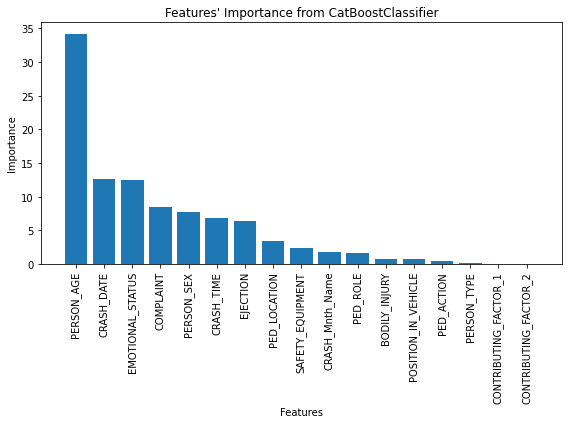

In [92]:
# plotting the feature importances from CatBoostClassifier as a barplot:
feat_imp_index = importances['Feature Id']
feat_imp_vals = importances['Importances']

plt.figure(figsize=(8,6))
plt.title("Features' Importance from CatBoostClassifier")
plt.bar(feat_imp_index, feat_imp_vals)
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

Feature Importance values from CatBoost Classifier shows that feature like - PERSON_AGE, EMOTIONAL_STATUS, COMPLAINT appear to be the most important for making predictions about Injuries during NYC collisions using this algorithm.

This is quite similar to the values computed using the Decision Tree and Random Forest Classifier.

#### CatBoost Classifier Tuning - using GridSearchCV:

Below were some parameters tuned for CatBoost Classifier:-

* learning rate - Boosting learning rate for model.
* max_depth - Maximum tree depth for base learners

In [93]:
# Defining a grid of hyperparameters for CatBoost Classifier Model:
params_catboost = {'max_depth': [3, 4, 5],
            'learning_rate': [0.1, 0.5, 1.0]}

# Calling the model tuning function with requisite Model argument:
model_tuning(CatBoostClassifier(random_state=1,iterations=5,verbose=False),params_catboost)

Results from GridSearchCV on CatBoostClassifier
Best Estimator:

 Best Score:
 0.9845116743644977

 Best Hyperparameters:
 {'learning_rate': 0.5, 'max_depth': 5}

 Classification Metrices on Tuned Model:
AUC Val of Best Model: 0.99


Combining all 2 parameters we see that **max_depth = 5 and learning_rate = 0.5** give us the best **AUC score of 99%** for CatBoost Classifier.

This is a score similar to that from both tuned Random Forest and tuned XGBoost Classifier model.

In [99]:
# Using the tuned CatBoost Classifier model -
cat_boost = CatBoostClassifier(max_depth=5, learning_rate = 0.5, random_state =1)

# training our train set with above optimal parameters:
cat_boost.fit(df_train, y_train,cat_features=categorical_features_indices,verbose=False)

# predicting the CatBoost for Classification model on the testing set:
y_pred3 = cat_boost.predict_proba(df_test)[:,1]

# computing the AUC score on testing set:
print('AUC on test CatBoost_Clasfr: %.3f' % roc_auc_score(y_test, y_pred3))

AUC on test CatBoost_Clasfr: 0.993


From the above computations on unseen data, we see that CatBoost Classifier results in an **AUC score of 99.3% on the testing set**. This score is very close to the AUC score from our best model Random Forest Classifer.

This is a good indication moreso because CatBoost model works well specifically on categorical data.